<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualización de datos: Creando gráficos de calidad

### Datos de población y de PIB

Daniel Oto-Peralías

### Importar librerías y datos

In [1]:
# IMPORTAMOS LIBRERIAS
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt

In [2]:
# IMPORTAMOS LOS DATOS
link="https://www.rug.nl/ggdc/docs/pwt100.xlsx"
pwt=pd.read_excel(link,"Data") # Es una base de datos grande

In [ ]:
# PREPARAMOS LOS DATOS

# Creamos una tabla con los datos de España e Italia de poblacion y pib.
# Seleccionamos países concretos
df=pwt[['year','country','pop','rgdpo']].query("country=='Spain' or country=='Italy'").copy()

In [ ]:
# Ponemos los datos en formato adecuado: 
    # A. Opción poco eficiente :(
df_sp=df.query("country=='Spain'").copy()
df_sp.rename(columns={"pop":"pop_sp","rgdpo":"rgdpo_sp"}, inplace=True)
df_it=df.query("country=='Italy'").copy()
df_it.rename(columns={"pop":"pop_it","rgdpo":"rgdpo_it"}, inplace=True)
df_spit=df_sp.merge(df_it,on="year")

In [ ]:
    # B. Opción eficiente :) 
        # Observar que hemos creado un MultiIndex table
df=df.set_index(['year','country']).unstack('country')
df.rename(columns={"Italy": "Italia","Spain":"España"},inplace=True) # Para luego que salga en castellano
df.index=pd.to_datetime(df.index,format='%Y') # Ponemos eje en formato fecha 

In [ ]:
# Creamos tasa de variacion
tv=df.diff()/df.shift()*100

In [ ]:
# Medias de las tasas de crecimiento totales
tv_mean=tv.mean()

In [ ]:
# Medias para cada periodo de 20 años
tv20=tv.resample('20A').mean()
tv20.index=tv20.index.strftime('%Y')

<AxesSubplot:title={'center':'Evol. PIB real'}, xlabel='year'>

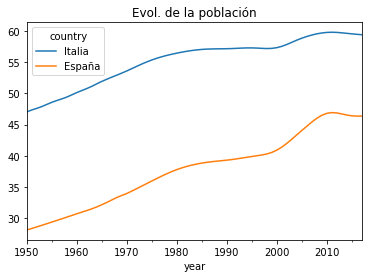

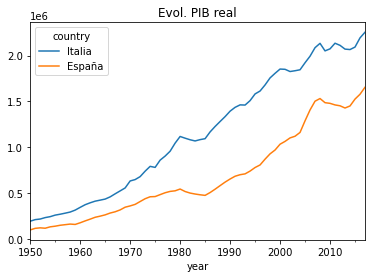

In [ ]:
# GRÁFICOS EXPLORATORIOS: dibujamos directamente desde panda
    # Evolución de la población y el GDP en niveles
df['pop'].plot(title="Evol. de la población")
df['rgdpo'].plot(title="Evol. PIB real")

<AxesSubplot:title={'center':'TV PIB real'}, xlabel='year'>

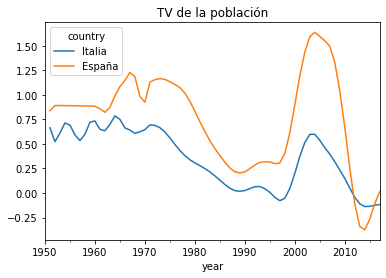

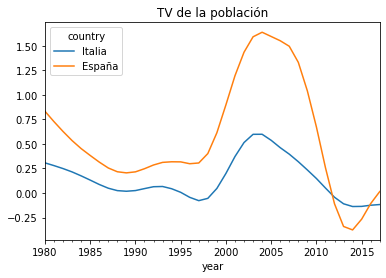

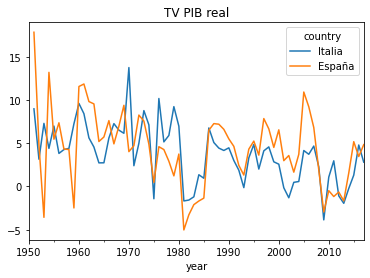

In [ ]:
    # Ahora las tasas de variacion
tv['pop'].plot(title="TV de la población")
tv['pop']["1980":].plot(title="TV de la población") # Esto para un periodo determinado
tv['rgdpo'].plot(title="TV PIB real")

<AxesSubplot:title={'center':'media de cada periodo de 20 años'}, xlabel='year'>

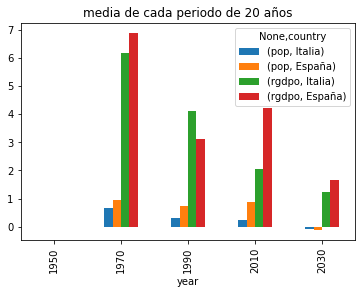

In [ ]:
    # Grafico de barras para media de cada periodo de 20 años
tv20.plot.bar(title="media de cada periodo de 20 años")
       #Imp: esto solo vale como gráficos exploratorios para uso personal.
       # Para otros propósitos, hay que preparar gráficos de más calidad.

### Gráficos de mejor calidad

In [ ]:
# GRÁFICOS DE BUENA CALIDAD (PARA INFORMES, TRABAJOS, ETC.)

# Elegimos un estilo que nos guste 
    # https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn')

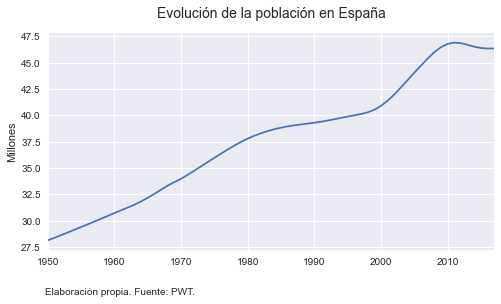

In [ ]:
# Figura 1: Evolución anual de la población en España
fig, ax=plt.subplots(figsize=(8,4))
df['pop']['España'].plot(ylabel="Millones",xlabel="", ax=ax)
ax.set_title("Evolución de la población en España", size=14, pad=15)
fig.text(0.25,-0.03,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

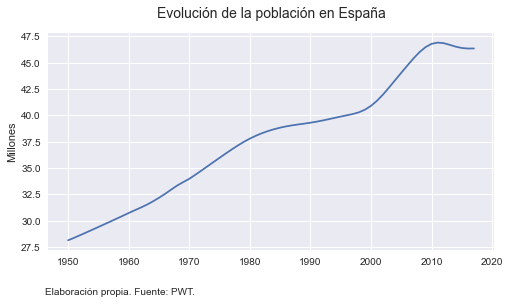

In [ ]:
    # Alternativamente, el código para la Fig 1 puede ser (100% matplotlib):
fig, ax=plt.subplots(figsize=(8,4))
ax.plot(df['pop']['España'])
ax.set_ylabel("Millones")
ax.set_title("Evolución de la población en España", size=14, pad=15)
fig.text(0.25,-0.03,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()     

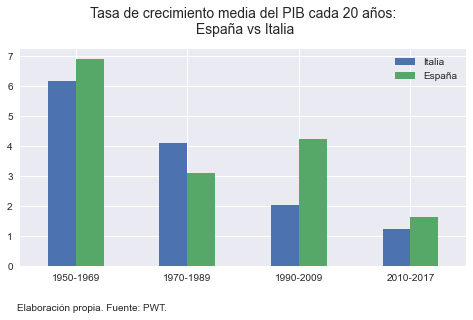

In [ ]:
# Figura 2: Tasa de crecimiento del PIB cada 20 años- España e Italia
fig, ax=plt.subplots(figsize=(8,4))
tv20['rgdpo'][1:].plot.bar(xlabel="", ax=ax)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2017"], rotation='horizontal')
ax.set_title("Tasa de crecimiento media del PIB cada 20 años:\n España vs Italia", size=14, pad=15)
ax.legend(title="")
fig.text(0.25,-0.03,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

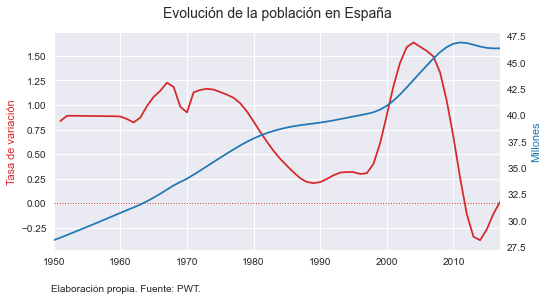

In [ ]:
# Figura 3: Evolución de la población y su tasa de crecimiento
fig, ax1=plt.subplots(figsize=(8,4))
    # Serie en eje y principal
tv['pop']['España'].plot(color='tab:red', ax=ax1)
    # Serie en eje y secundario (derecha)
ax2 = ax1.twinx()  # aquí se establece un segundo eje Y que comparte el mismo eje X
df['pop']['España'].plot(color='tab:blue', ax=ax2)
ax2.grid(False)
    # Ax1, Ax2: más detalles y línea de 0 
ax1.set_ylabel("Tasa de variación",color='tab:red')
ax1.set_xlabel("")
ax2.set_ylabel("Millones", color='tab:blue')
ax1.axhline(y=0, linewidth=1, linestyle=":", color="tab:red")
    # Título etc
plt.title("Evolución de la población en España", size=14, pad=15)
fig.text(0.25,-0.02,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

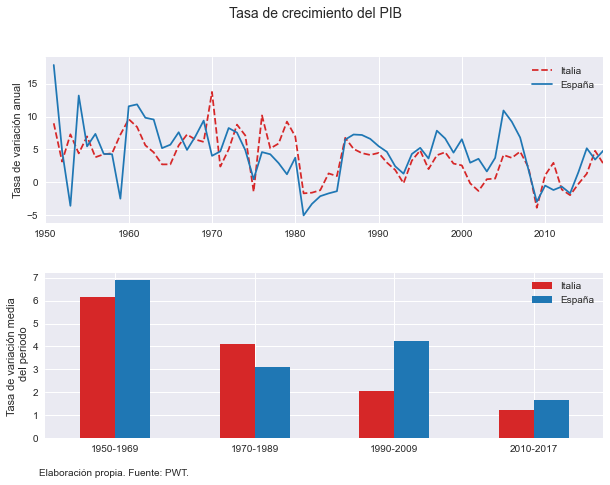

In [ ]:
# Figura 4: Tasa de crecimiento del PIB España e Italia (2 gráficos)
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(10,7))
# Axes1
tv['rgdpo']['Italia'].plot(label="Italia",style="--",c="tab:red", ax=ax1)
tv['rgdpo']['España'].plot(label="España",style="-", c="tab:blue", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Tasa de variación anual")
ax1.legend()
# Axes2
tv20['rgdpo'][1:].plot.bar(ax=ax2, color=['tab:red','tab:blue'])
ax2.set_xticks([0,1,2,3])
ax2.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2017"], rotation='horizontal')
ax2.set_xlabel("")
ax2.set_ylabel("Tasa de variación media \n del periodo")
ax2.legend(title="")
# Aplicable al conjunto de la figura
fig.suptitle("Tasa de crecimiento del PIB", size=14)
fig.text(0.22,0.05,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.subplots_adjust(hspace=0.3)
plt.show()

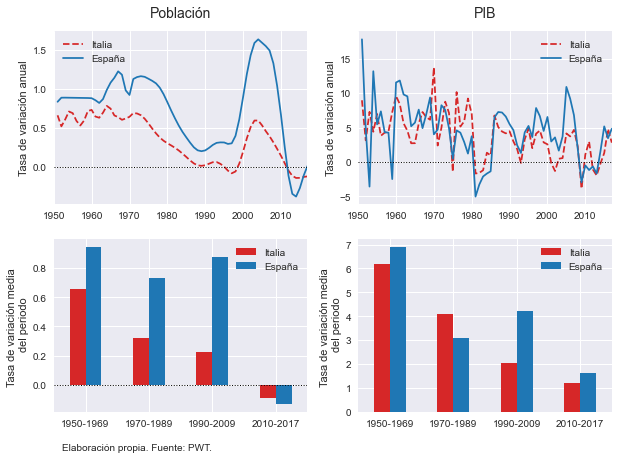

In [ ]:
# Figura 5: Tasa de crecimiento del PIB y la población España e Italia (4 gráficos)
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,7))
# Axes1
tv['pop']['Italia'].plot(label="Italia",style="--",c="tab:red", ax=ax1)
tv['pop']['España'].plot(label="España",style="-", c="tab:blue", ax=ax1)
ax1.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax1.set_xlabel("")
ax1.set_ylabel("Tasa de variación anual")
ax1.set_title("Población", size=14, pad=14)
ax1.legend(frameon=False)
# Axes2
tv['rgdpo']['Italia'].plot(label="Italia",style="--",c="tab:red", ax=ax2)
tv['rgdpo']['España'].plot(label="España",style="-", c="tab:blue", ax=ax2)
ax2.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax2.set_xlabel("")
ax2.set_ylabel("Tasa de variación anual")
ax2.set_title("PIB", size=14, pad=14)
ax2.legend(frameon=False)
# Axes3
tv20['pop'][1:].plot.bar(ax=ax3, color=['tab:red','tab:blue'])
ax3.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax3.set_xticks([0,1,2,3])
ax3.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2017"], rotation='horizontal')
ax3.set_xlabel("")
ax3.set_ylabel("Tasa de variación media \n del periodo")
ax3.legend(title="", frameon=False)
# Axes4
tv20['rgdpo'][1:].plot.bar(ax=ax4, color=['tab:red','tab:blue'])
ax4.set_xticks([0,1,2,3])
ax4.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2017"], rotation='horizontal')
ax4.set_xlabel("")
ax4.set_ylabel("Tasa de variación media \n del periodo")
ax4.legend(title="", frameon=False)
# Aplicable al conjunto de la figura
fig.text(0.24,0.05,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.subplots_adjust(hspace=0.2)
plt.show()

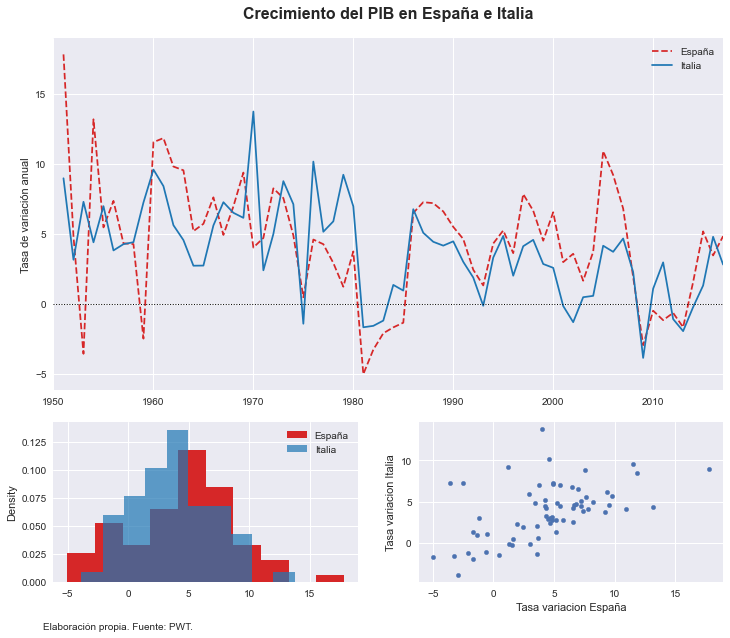

In [ ]:
# Figura 6: Tasa de crecimiento del PIB en España e Italia
gridsize=(3,2) #  cuadrícula de 3 filas y 2 coolumnas
fig=plt.figure(figsize=(12,10))
ax1=plt.subplot2grid(gridsize,(0,0),colspan=2,rowspan=2)
ax2=plt.subplot2grid(gridsize,(2,0))
ax3=plt.subplot2grid(gridsize,(2,1))
#Axes1
tv['rgdpo']['España'].plot(label="España",style="--",c="tab:red", ax=ax1)
tv['rgdpo']['Italia'].plot(label="Italia",style="-", c="tab:blue", ax=ax1)
ax1.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax1.set_xlabel("")
ax1.set_xlabel("")
ax1.set_ylabel("Tasa de variación anual")
ax1.set_title("Crecimiento del PIB en España e Italia", size=16, pad=20, fontweight='bold')
ax1.legend(frameon=False)
#Axes2
tv['rgdpo']['España'].plot.hist(label="España",color="tab:red", ax=ax2, density=True)
tv['rgdpo']['Italia'].plot.hist(label="Italia",color="tab:blue",ax=ax2, density=True, alpha=0.7)
ax2.set_ylabel("Density")
ax2.legend(frameon=False)
#Axes3
tv['rgdpo'].plot.scatter(x='España',y='Italia',ax=ax3)
ax3.set_ylabel("Tasa variacion Italia")
ax3.set_xlabel("Tasa variacion España")
# Aplicable al conjunto de la figura
fig.text(0.2,0.06,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.subplots_adjust(hspace=0.2)
plt.show()


In [ ]:
tv20

pop               rgdpo          
country    Italia    España    Italia    España
year                                           
1950          NaN       NaN       NaN       NaN
1970     0.653695  0.945862  6.171120  6.887222
1990     0.321417  0.731329  4.101233  3.113490
2010     0.223264  0.876539  2.033032  4.223699
2030    -0.088687 -0.132925  1.229982  1.651073